goods.json 里面存放了某几个城市的商品生成数据，单位为吨。请用分组柱状图绘制出来。

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import json
"""1.读取数据"""
data = json.loads(open('goods.json',mode='r',encoding='utf-8').read())
print(data)
"""2.过滤城市"""
#有四类商品,键值对找到城市,切片4找出x轴对应城市
# x_ticket=[item['city'] for item in data]
#切片4找出x轴对应城市
x_ticket=[item['city'] for item in data][::4]
print(x_ticket)   # 城市名值
print(len(x_ticket))  #城市个数:8

[{'city': '石家庄', 'type': '水果', 'value': 14500}, {'city': '石家庄', 'type': '米面', 'value': 8500}, {'city': '石家庄', 'type': '特产零食', 'value': 10000}, {'city': '石家庄', 'type': '茶叶', 'value': 7000}, {'city': '深圳', 'type': '水果', 'value': 9000}, {'city': '深圳', 'type': '米面', 'value': 8500}, {'city': '深圳', 'type': '特产零食', 'value': 11000}, {'city': '深圳', 'type': '茶叶', 'value': 6000}, {'city': '温州', 'type': '水果', 'value': 16000}, {'city': '温州', 'type': '米面', 'value': 5000}, {'city': '温州', 'type': '特产零食', 'value': 6000}, {'city': '温州', 'type': '茶叶', 'value': 10000}, {'city': '宁波', 'type': '水果', 'value': 14000}, {'city': '宁波', 'type': '米面', 'value': 9000}, {'city': '宁波', 'type': '特产零食', 'value': 10000}, {'city': '宁波', 'type': '茶叶', 'value': 9000}, {'city': '无锡', 'type': '水果', 'value': 14000}, {'city': '无锡', 'type': '米面', 'value': 9000}, {'city': '无锡', 'type': '特产零食', 'value': 10000}, {'city': '无锡', 'type': '茶叶', 'value': 6000}, {'city': '杭州', 'type': '水果', 'value': 9000}, {'city': '杭州', 'type': '米面', 'v

In [3]:
"""3.规整列表数据"""
y_data={}
for d in data:
    #填入城市名
    if d['city'] not in y_data:
        #y_data[d['city']]=d['value'] AttributeError: 'int' object has no attribute 'append'
        y_data[d['city']]=[d['value']]
    else:
        y_data[d['city']].append(d['value'])
print(y_data)  #键值对 --->  '城市':[a销量,b销量,c销量,d销量]
print(len(y_data))    # 八座城市,八对键值对

{'石家庄': [14500, 8500, 10000, 7000], '深圳': [9000, 8500, 11000, 6000], '温州': [16000, 5000, 6000, 10000], '宁波': [14000, 9000, 10000, 9000], '无锡': [14000, 9000, 10000, 6000], '杭州': [9000, 8500, 10000, 6000], '北京': [17000, 6000, 7000, 10000], '上海': [18000, 11000, 15000, 14000]}
8


In [24]:
"""4.构建分类数据"""
#四类商品 二维数组[['水果'],['米面'],['特产零食'],['茶叶']]
kind_data=[]    
quantity=list(y_data.values())  #城市四类商品的销量[[],[],[]……总八个]
print("按照城市名分类的销量:")
print(quantity)
for i in range(len(quantity[0])):
    #添加八个城市商品销量
    kind_data.append(
                    [
                        quantity[0][i],
                        quantity[1][i],
                        quantity[2][i],
                        quantity[3][i],
                        quantity[4][i],
                        quantity[5][i],
                        quantity[6][i],
                        quantity[7][i]
                    ]
    )
# for i in range(0,len(x_ticket)):
#     for j in range(len(quantity[0])):
#         kind_data.append(
#                         [
#                             quantity[i][j]
#                         ]
#         )
print("按照商品类型分类的销量:")
print(kind_data)
print(len(kind_data))   # 4 种水果
print(len(kind_data[0])) # 一种水果有8种数据  

按照城市名分类的销量:
[[14500, 8500, 10000, 7000], [9000, 8500, 11000, 6000], [16000, 5000, 6000, 10000], [14000, 9000, 10000, 9000], [14000, 9000, 10000, 6000], [9000, 8500, 10000, 6000], [17000, 6000, 7000, 10000], [18000, 11000, 15000, 14000]]
按照商品类型分类的销量:
[[14500, 9000, 16000, 14000, 14000, 9000, 17000, 18000], [8500, 8500, 5000, 9000, 9000, 8500, 6000, 11000], [10000, 11000, 6000, 10000, 10000, 10000, 7000, 15000], [7000, 6000, 10000, 9000, 6000, 6000, 10000, 14000]]
4
8


[14500, 9000, 16000, 14000, 14000, 9000, 17000, 18000]
[-0.3, 0.7, 1.7, 2.7, 3.7, 4.7, 5.7, 6.7]
[8500, 8500, 5000, 9000, 9000, 8500, 6000, 11000]
[-0.15, 0.85, 1.85, 2.85, 3.85, 4.85, 5.85, 6.85]
[10000, 11000, 6000, 10000, 10000, 10000, 7000, 15000]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
[7000, 6000, 10000, 9000, 6000, 6000, 10000, 14000]
[0.15, 1.15, 2.15, 3.15, 4.15, 5.15, 6.15, 7.15]


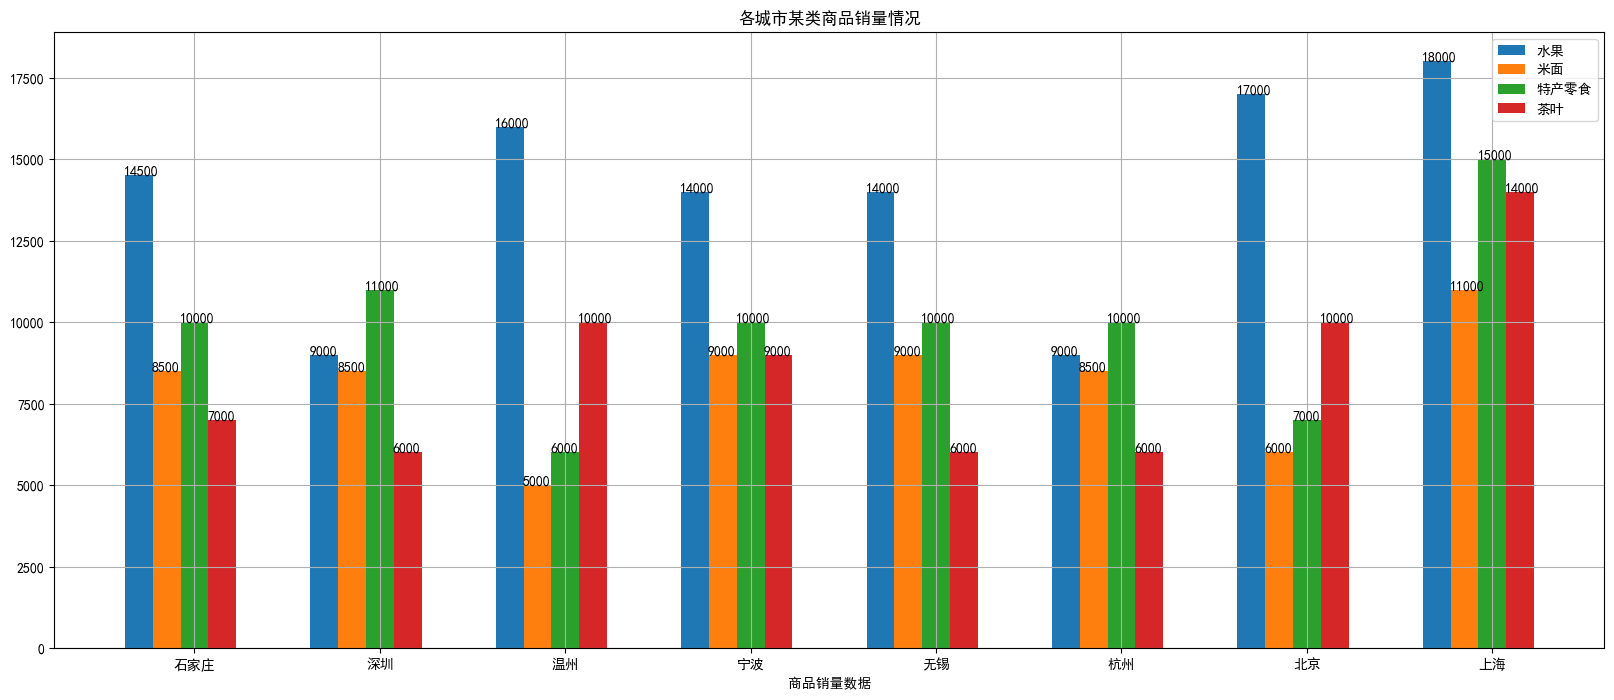

In [43]:
"""5.画图"""
#大柱子宽度
width = 0.75
#小柱子宽度
# bin_width=width/4
bin_width = width / 5

#数据索引
index = range(len(y_data))  #8

plt.figure(figsize=(20, 8), dpi=100)

kind_list = ['水果', '米面', '特产零食', '茶叶']

for solo in range(len(kind_data)):
    # 遍历销量数据
    kind_tickets = kind_data[solo]
    print(kind_tickets)

    #构建 X 位置的索引
    X_loc_index = [i - (bin_width * (2 - solo)) for i in index]
    print(X_loc_index)
    #绘制柱状图
    plt.bar(X_loc_index,    #x
            kind_tickets,    #height
            width=bin_width,   #width
            label=f"{kind_list[solo]}")   #标签

    # 添加坐标上的数字
    #zip()          -->         (销量,商品索引) 
    for ticket, x in zip(kind_tickets,X_loc_index):
        plt.annotate(ticket,xy=(x,ticket),xytext=(x-0.08,ticket+0.1))
        
# 显示label内容        
plt.legend()  

#虚线格
plt.grid()

#x轴文字索引
plt.xticks(index,y_data.keys())

#x轴y轴含义
plt.xlabel('城市')
plt.xlabel('商品销量数据')

#图表标题
plt.title('各城市某类商品销量情况')

#保存图片
plt.savefig('各城市某类商品销量情况.png')

In [34]:
# plt.bar?

In [35]:
# plt.annotate?

In [38]:
plt.legend?